<a href="https://colab.research.google.com/github/hws2002/Master-Python-with-Just-One-Book-ADP/blob/main/Chapter5/ML_process_4_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 1. 데이터 확인
사이킷런의 데이터세트로부터 보스턴 주택가격 데이터를 가져온 뒤 이를 데이터프레임으로 변환한다.

In [ ]:
from sklearn import datasets
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df, price = datasets.fetch_openml('boston', return_X_y = True)

df['PRICE'] = price

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.shape

(506, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  PRICE    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [ ]:
# RAD변수는 고속도로 용이도에 대한 값이다.
# 산점도를 그려 PRICE 변수와의 상관관계를 직관적으로 확인할 수 있도록 RAD변수를 정수(int)로 변환한다.
df['RAD'] = df['RAD'].astype(int)

In [ ]:
# 데이터에 결측치가 있는지 확인해보자
df.isna().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


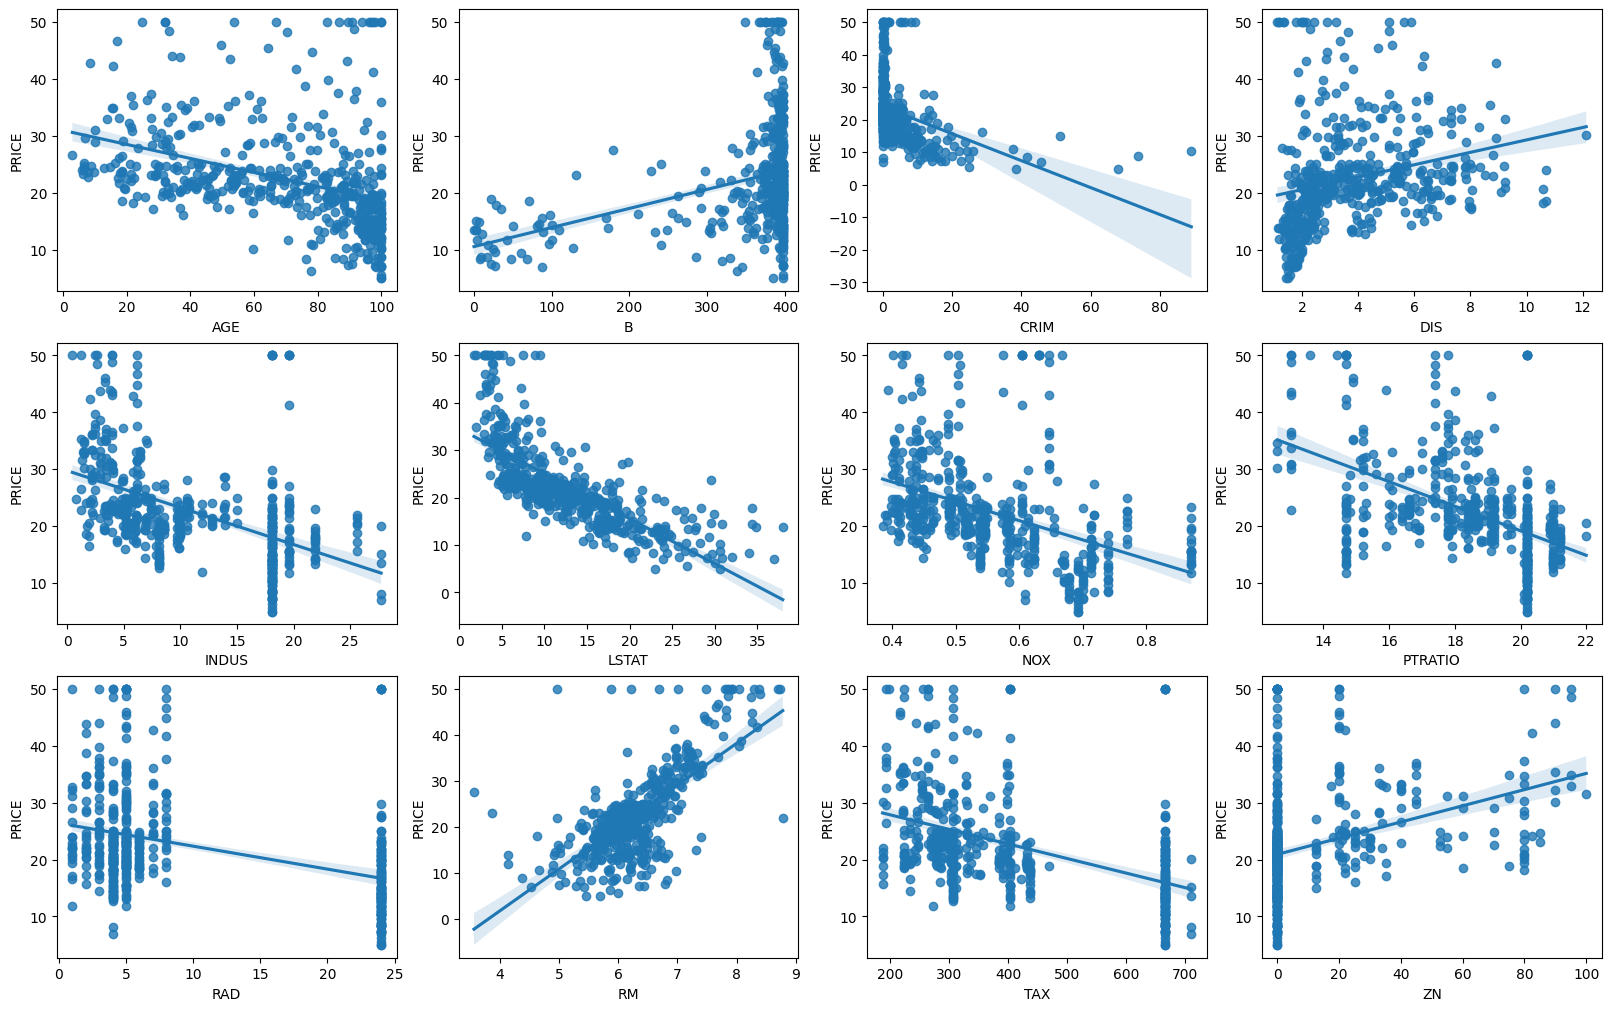

In [ ]:
# 산점도와 선형 회귀직선을 함께 시각화해보자
# CHAS 변수는 제외한다
import matplotlib.pyplot as plt
import seaborn as sns

# 3개의 행과 4개의 열을 가진 subplot을 그리자
fig, axs = plt.subplots(figsize = (16,10), ncols = 4, nrows = 3, constrained_layout = True)

features = df.columns.difference(['PRICE','CHAS'])

for i, feature in zip(range(12), features):
  sns.regplot(x = feature, y = 'PRICE', data = df, ax = axs[int(i/4)][i%4])

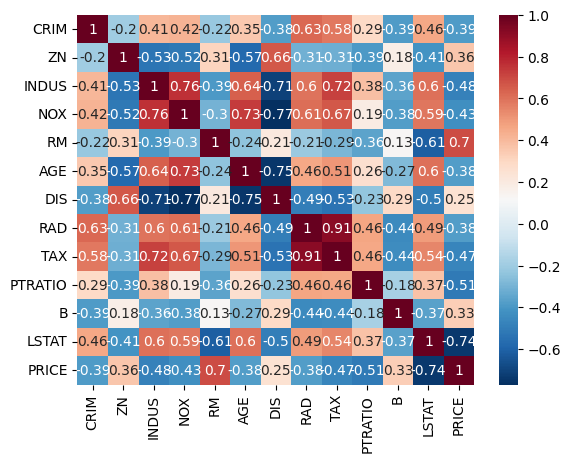

In [ ]:
# 상관행렬
df_corr = df.drop(columns = ['CHAS']).corr(method = 'pearson')

sns.heatmap(df_corr, xticklabels = df_corr.columns, yticklabels = df_corr.columns, cmap = 'RdBu_r', annot = True)
plt.show()

# 2.데이터 분할

In [ ]:
print(features)
x = df[features].values
pd.DataFrame(x)

Index(['AGE', 'B', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO', 'RAD',
       'RM', 'TAX', 'ZN'],
      dtype='object')


,0,1,2,3,4,5,6,7,8,9,10,11
0,65.2,396.90,0.00632,4.0900,2.31,4.98,0.538,15.3,1.0,6.575,296.0,18.0
1,78.9,396.90,0.02731,4.9671,7.07,9.14,0.469,17.8,2.0,6.421,242.0,0.0
2,61.1,392.83,0.02729,4.9671,7.07,4.03,0.469,17.8,2.0,7.185,242.0,0.0
3,45.8,394.63,0.03237,6.0622,2.18,2.94,0.458,18.7,3.0,6.998,222.0,0.0
4,54.2,396.90,0.06905,6.0622,2.18,5.33,0.458,18.7,3.0,7.147,222.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,0.06263,2.4786,11.93,9.67,0.573,21.0,1.0,6.593,273.0,0.0
502,76.7,396.90,0.04527,2.2875,11.93,9.08,0.573,21.0,1.0,6.120,273.0,0.0
503,91.0,396.90,0.06076,2.1675,11.93,5.64,0.573,21.0,1.0,6.976,273.0,0.0
504,89.3,393.45,0.10959,2.3889,11.93,6.48,0.573,21.0,1.0,6.794,273.0,0.0


In [62]:
from sklearn.model_selection import train_test_split

x = df[features].values

y = df['PRICE'].values

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

print("X_train, X_test shape : ", X_train.shape, X_test.shape)

X_train, X_test shape :  (404, 12) (102, 12)


In [65]:
print('학습데이터세트 PRICE 평균 : ', y_train.mean())
print('평가데이터세트 PRICE 평균 : ', y_test.mean())

학습데이터세트 PRICE 평균 :  22.796534653465343
평가데이터세트 PRICE 평균 :  21.488235294117644


# 3. 전처리
Min-Max 방법으로 정규화해보자

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)

# 4. 모델학습
회귀분석은 선형 회귀 알고리즘을 사용해보자   
사이킷런의 LinearRegression 클래스를 import한 뒤 선형 회귀 OLS를 선언한다.  
Min-Max로 정규화한 x_scaled와 주택가격값인 y_train을 모델에 입력해 fit()으로 학습한다.

In [67]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_sc, y_train)

LinearRegression()

In [73]:

pred_train = model.predict(X_train_sc)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("학습 데이터 MAE : ", mean_absolute_error(y_train, pred_train))
print("학습 데이터 MSE : ", mean_squared_error(y_train, pred_train))
print("학습 데이터 R2 score : ", r2_score(y_train, pred_train))


학습 데이터 MAE :  3.3261556522008475
학습 데이터 MSE :  22.112459783078027
학습 데이터 R2 score :  0.7454634121900364


# 5. 성능평가 및 예측값 저장

In [80]:
import numpy as np

X_test_sc = scaler.transform(X_test)
pred_test = model.predict(X_test_sc)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred_test)

print("MAE: {0: .5f}".format(mae))
print("MSE: {0: .5f}".format(mse))
print("RMSE: {0: .5f}".format(rmse))
print("R2: {0: .5f}".format(r2))

MAE:  3.23724
MSE:  24.63539
RMSE:  4.96341
R2:  0.66406


In [81]:
pred_df = pd.DataFrame(pred_test, columns = ['pred price'])
pred_df.head()

,pred price
0,29.218660
1,33.551467
2,14.810658
3,25.084725
4,19.173927


In [84]:
actual = pd.DataFrame(y_test, columns = ['actual price'])
actual.head()

,actual price
0,23.6
1,32.4
2,13.6
3,22.8
4,16.1


In [85]:
reg_result = pd.concat([actual, pred_df], axis = 1)
reg_result.to_csv('reg_result.csv', index = False, encoding = 'utf-8-sig')
reg_result.head()

,actual price,pred price
0,23.6,29.218660
1,32.4,33.551467
2,13.6,14.810658
3,22.8,25.084725
4,16.1,19.173927
